## K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a simple yet effective classification algorithm that operates based on the principle that similar instances tend to be near each other. It classifies a new data point based on the majority vote of its 'k' nearest neighbors, where 'k' is a user-defined constant and the neighbors are taken from a set of objects for which the correct classification is known. KNN is a type of instance-based learning, when a new data point needs to be classified, KNN calculates the distance (commonly Euclidean, but other metrics like Manhattan or Minkowski can also be used) between this new point and all other points in the dataset. All computation is deferred until classification.

Using KNN to classify heart disease can be particularly useful in identifying the presence of heart disease, since the dataset provides a set of well-defined features for measuring the similarity between patient cases and the dataset is not very large.

### Import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Load data

In [2]:
data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
data

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [3]:
# Split the data into features and target variable
X = data.drop('target', axis=1)
y = data['target']

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### feature scaling

In [5]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### KNN model setup

Classifying the new data point based on the majority vote of its 29 ($\sqrt{n_{train}}$) nearest neighbors. I also tried different k values, they also provide similar accuracy.

In [ ]:
start_time = time.time()

In [30]:
# Initialize the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=29)

In [31]:
# Train the model
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=29)

In [ ]:
end_time = time.time()
elapsed_time = end_time - start_time
print(f"KNN model fitting time: {elapsed_time:.3f} seconds")

### Predictive Performance

In [32]:
# Predict on the test data
y_pred = knn_model.predict(X_test_scaled)

In [35]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))

Accuracy: 86.55%
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       154
           1       0.89      0.87      0.88       203

    accuracy                           0.87       357
   macro avg       0.86      0.86      0.86       357
weighted avg       0.87      0.87      0.87       357



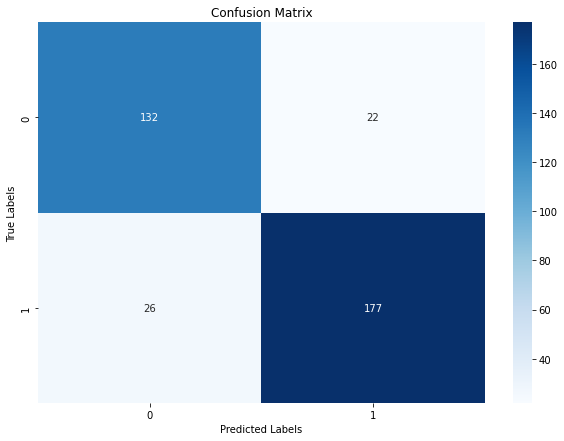

In [36]:
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

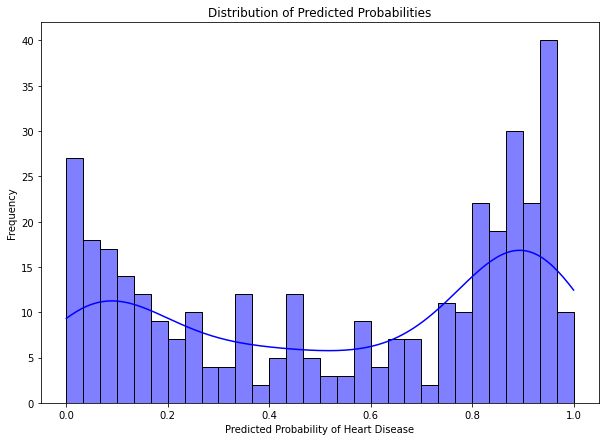

In [37]:
# Predictive checks plot (Histogram of predicted probabilities)
probs = knn_model.predict_proba(X_test_scaled)[:, 1]
plt.figure(figsize=(10, 7))
sns.histplot(probs, bins=30, kde=True, color='blue')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability of Heart Disease')
plt.ylabel('Frequency')
plt.show()

### Conclusion

The above KNN model demonstrates an accuracy of 86.55% in predicting the presence of heart disease, showcasing predictive performance comparable to that of the Bayesian Logistic Lasso regression model. However, it didn't outperform the Random Forest model, which not only achieves exceptional performance but also provides insights into the ranking of feature importance for understanding crucial features of heart disease. 

Among the three classification models Bayesian Logistic Lasso, KNN, and Random Forest, the latter stands out. It not only delivers the highest prediction accuracy but also details feature importance, which adds a layer of interpretability, which is missing in the other models. In terms of computational efficiency, both the Random Forest and KNN models rapidly produce results in just seconds, whereas the Bayesian Logistic model requires about 30 seconds. Overall, the Random Forest model emerges as the superior choice due to its robust performance, detailed feature insights, and fast computation.